In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import missingno as ms
import mplcyberpunk
plt.style.use("cyberpunk")

In [59]:
df = pd.read_csv("data/csv/aceh_production_data_daily_ed.csv", parse_dates=True)

In [60]:
df = df.sort_values(by=["DATEPRD"]).reset_index().drop(columns=['index'])

In [61]:
df

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0      2007-09-01        Well-N2            NaN                    NaN   
1      2007-09-01        Well-W2            NaN                    NaN   
2      2007-09-02        Well-W2            NaN                    NaN   
3      2007-09-02        Well-N2            NaN                    NaN   
4      2007-09-03        Well-W2            NaN                    NaN   
...           ...            ...            ...                    ...   
15629  2016-10-05        Well-W2            NaN                    NaN   
15630  2016-10-06        Well-W2            NaN                    NaN   
15631  2016-10-07        Well-W2            NaN                    NaN   
15632  2016-11-01        Well-W2            NaN                    NaN   
15633  2016-12-01        Well-W2            NaN                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_WHP_P  AVG_WHT_P  \
0                           NaN            NaN        NaN        NaN   
1                           NaN            NaN        NaN        NaN   
2                           NaN            NaN        NaN        NaN   
3                           NaN            NaN        NaN        NaN   
4                           NaN            NaN        NaN        NaN   
...                         ...            ...        ...        ...   
15629                       NaN            NaN        NaN        NaN   
15630                       NaN            NaN        NaN        NaN   
15631                       NaN            NaN        NaN        NaN   
15632                       NaN            NaN        NaN        NaN   
15633                       NaN            NaN        NaN        NaN   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  \
0                NaN           NaN           NaN           NaN          NaN   
1                NaN           NaN           NaN           NaN          NaN   
2                NaN           NaN           NaN           NaN          NaN   
3                NaN           NaN           NaN           NaN          NaN   
4                NaN           NaN           NaN           NaN          NaN   
...              ...           ...           ...           ...          ...   
15629            NaN           NaN           NaN           NaN          NaN   
15630            NaN           NaN           NaN           NaN          NaN   
15631            NaN           NaN           NaN           NaN          NaN   
15632            NaN           NaN           NaN           NaN          NaN   
15633            NaN           NaN           NaN           NaN          NaN   

       FLOW_KIND  
0      injection  
1      injection  
2      injection  
3      injection  
4      injection  
...          ...  
15629  injection  
15630  injection  
15631  injection  
15632  injection  
15633  injection  

[15634 rows x 14 columns]

In [62]:
df["WELL_BORE_CODE"].unique()

array(['Well-N2', 'Well-W2', 'Well-W1', 'Well-C1', 'Well-N1', 'Well-S1',
       'Well-E1'], dtype=object)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   WELL_BORE_CODE            15634 non-null  object 
 2   ON_STREAM_HRS             15349 non-null  float64
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 5   AVG_DP_TUBING             8980 non-null   float64
 6   AVG_WHP_P                 9155 non-null   float64
 7   AVG_WHT_P                 9146 non-null   float64
 8   DP_CHOKE_SIZE             15340 non-null  float64
 9   BORE_OIL_VOL              9161 non-null   float64
 10  BORE_GAS_VOL              9161 non-null   float64
 11  BORE_WAT_VOL              9161 non-null   float64
 12  BORE_WI_VOL               5706 non-null   float64
 13  FLOW_KIND                 15634 non-null  object 
dtypes: flo

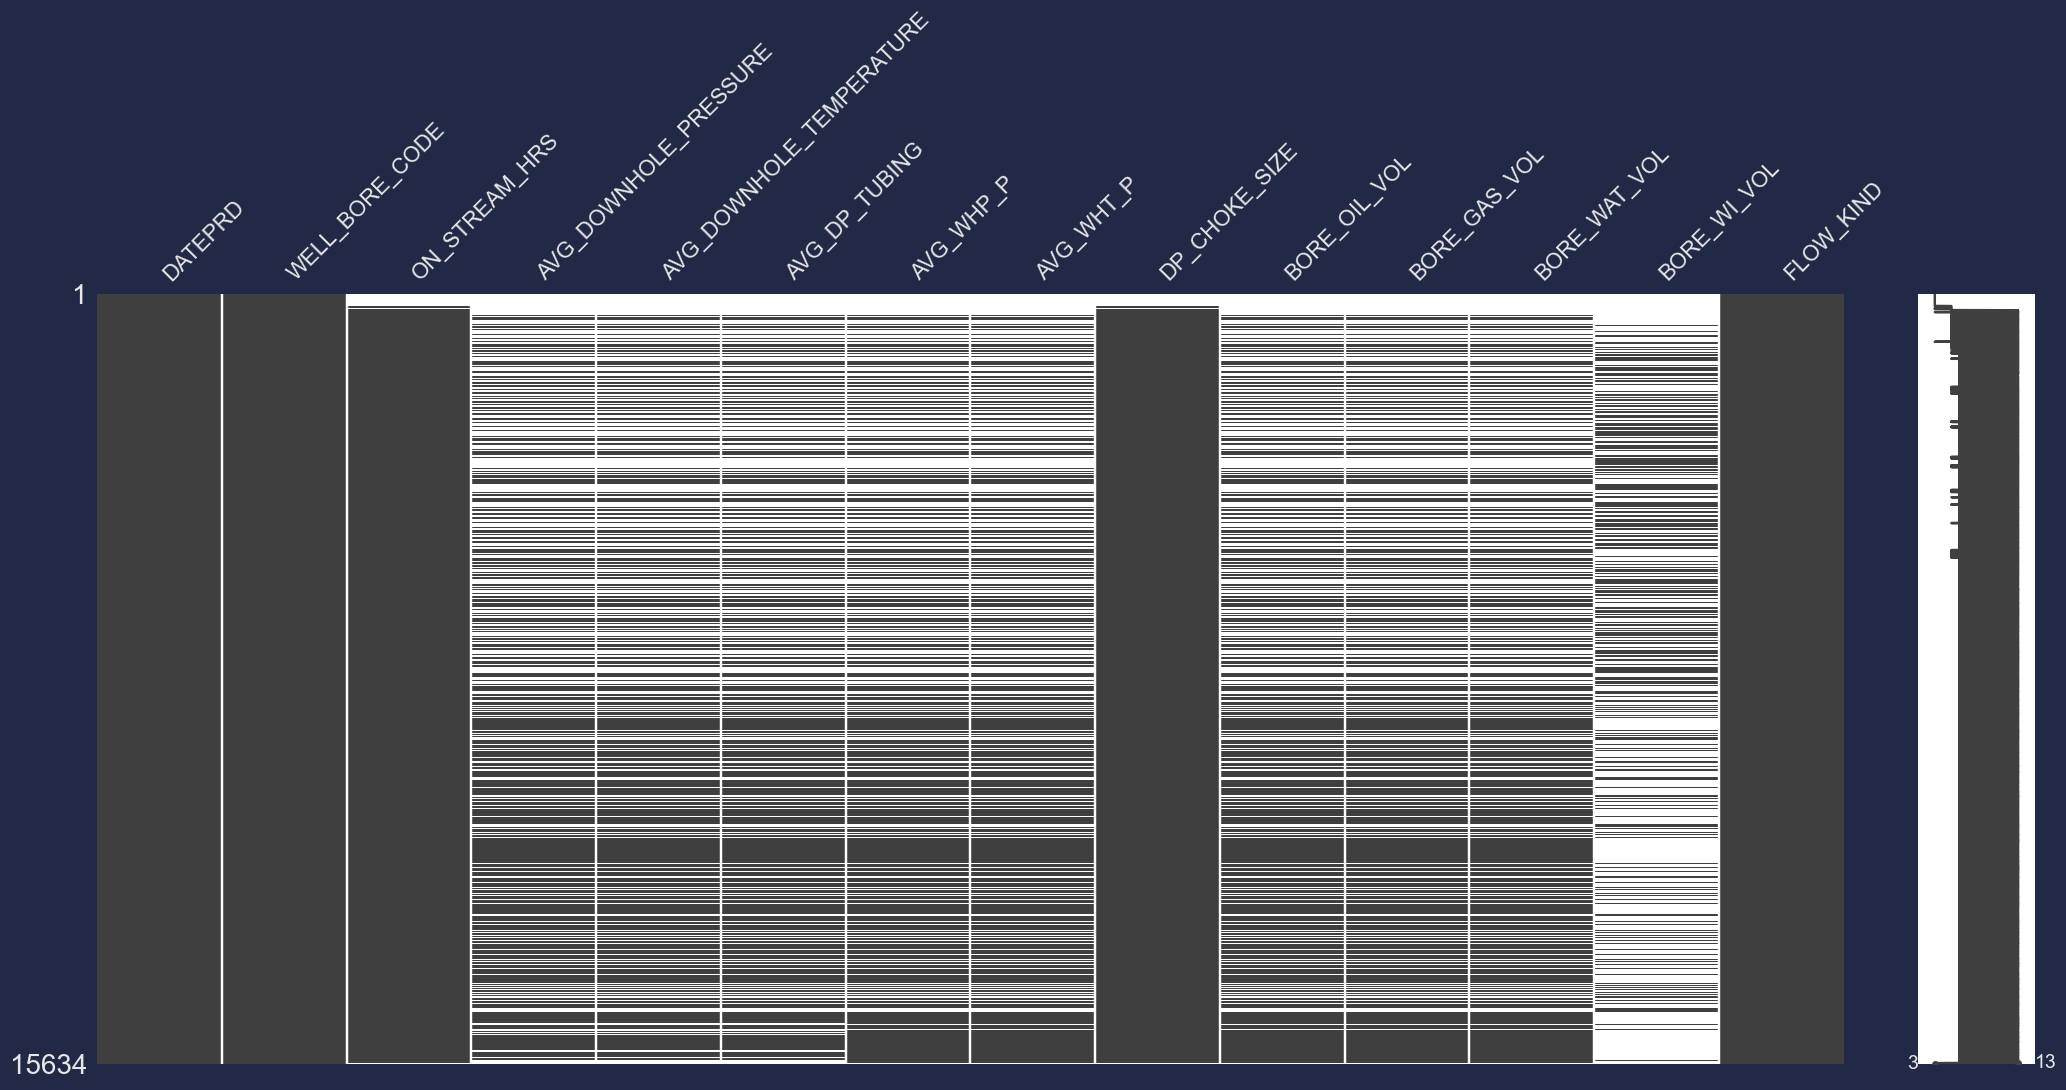

In [64]:
ms.matrix(df);

In [65]:
df.describe()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
count   15349.000000            8980.000000               8980.000000   
mean       19.994093             181.803869                 77.162969   
std         8.369978             109.712363                 45.657948   
min         0.000000               0.000000                  0.000000   
25%        24.000000               0.000000                  0.000000   
50%        24.000000             232.896939                103.186689   
75%        24.000000             255.401455                106.276591   
max        25.000000             397.588550                108.502178   

       AVG_DP_TUBING    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
count    8980.000000  9155.000000  9146.000000   15340.000000   9161.000000   
mean      154.028787    45.377811    67.728440      11.441060   1095.631548   
std        76.752373    24.752631    27.719028      19.816928   1323.538151   
min         0.000000     0.000000     0.000000       0.000000      0.000000   
25%        83.665361    31.148062    56.577834       0.000000    190.690000   
50%       175.588861    37.933620    80.071250       2.384969    557.550000   
75%       204.319964    57.101268    88.062202      13.765020   1345.200000   
max       345.906770   137.311030    93.509584     125.718570   5901.840000   

        BORE_GAS_VOL  BORE_WAT_VOL   BORE_WI_VOL  
count    9161.000000   9161.000000   5706.000000  
mean   161049.059703   1672.151332   5315.480815  
std    188136.410434   1706.982853   2181.486695  
min         0.000000   -457.840000      0.000000  
25%     29430.590000     19.870000   4338.204674  
50%     87749.660000   1097.790000   5504.739769  
75%    202482.300000   3260.950000   6781.058040  
max    851131.520000   8019.740000  10013.600000

In [66]:
df.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
dtype: int64

# Data Preprocessing & Data Cleaning, EDA

In [67]:
# see all the oil production from all well

import plotly.express as px

wellwell = ["Well-N1", "Well-C1", "Well-E1", "Well-W1", "Well-S1"]

well_df = df[df["WELL_BORE_CODE"].isin(wellwell)]

fig = px.line(
        df,
        x='DATEPRD',
        y=['BORE_OIL_VOL'],
        color='WELL_BORE_CODE',
        labels={
            "value":"Production (m3)",
            "DATEPRD": "Year",
        }
    )
fig.show()

Try for Well-C1

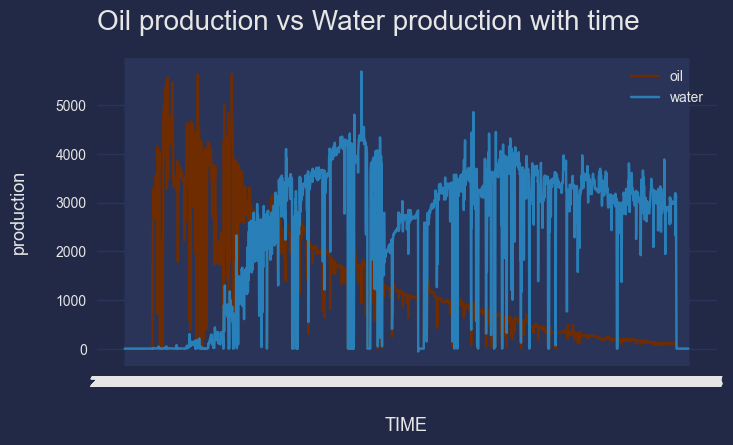

In [68]:
# EDA

# ['Well-N2', 'Well-W2', 'Well-C1', 'Well-W1', 'Well-N1', 'Well-S1', 'Well-E1']
df_well_c1 = df[df["WELL_BORE_CODE"] == "Well-C1"]

# main figure object
plt.figure(figsize= (8,4))
# make scatter plot between oil and gas production
plt.plot( df_well_c1["DATEPRD"], df_well_c1["BORE_OIL_VOL"],color="#6E2C00",label="oil") 
plt.plot(df_well_c1["DATEPRD"], df_well_c1["BORE_WAT_VOL"],color="#2980B9",label="water");

# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20)
plt.ylabel("production", fontsize= 13, labelpad = 20,loc="center")

# setting figure title 
plt.title("Oil production vs Water production with time ", fontsize= 20, pad = 20,loc="left")

plt.legend()
plt.show()

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["BORE_OIL_VOL"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=False
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["BORE_WAT_VOL"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=False
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Volume (m3)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Volume Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

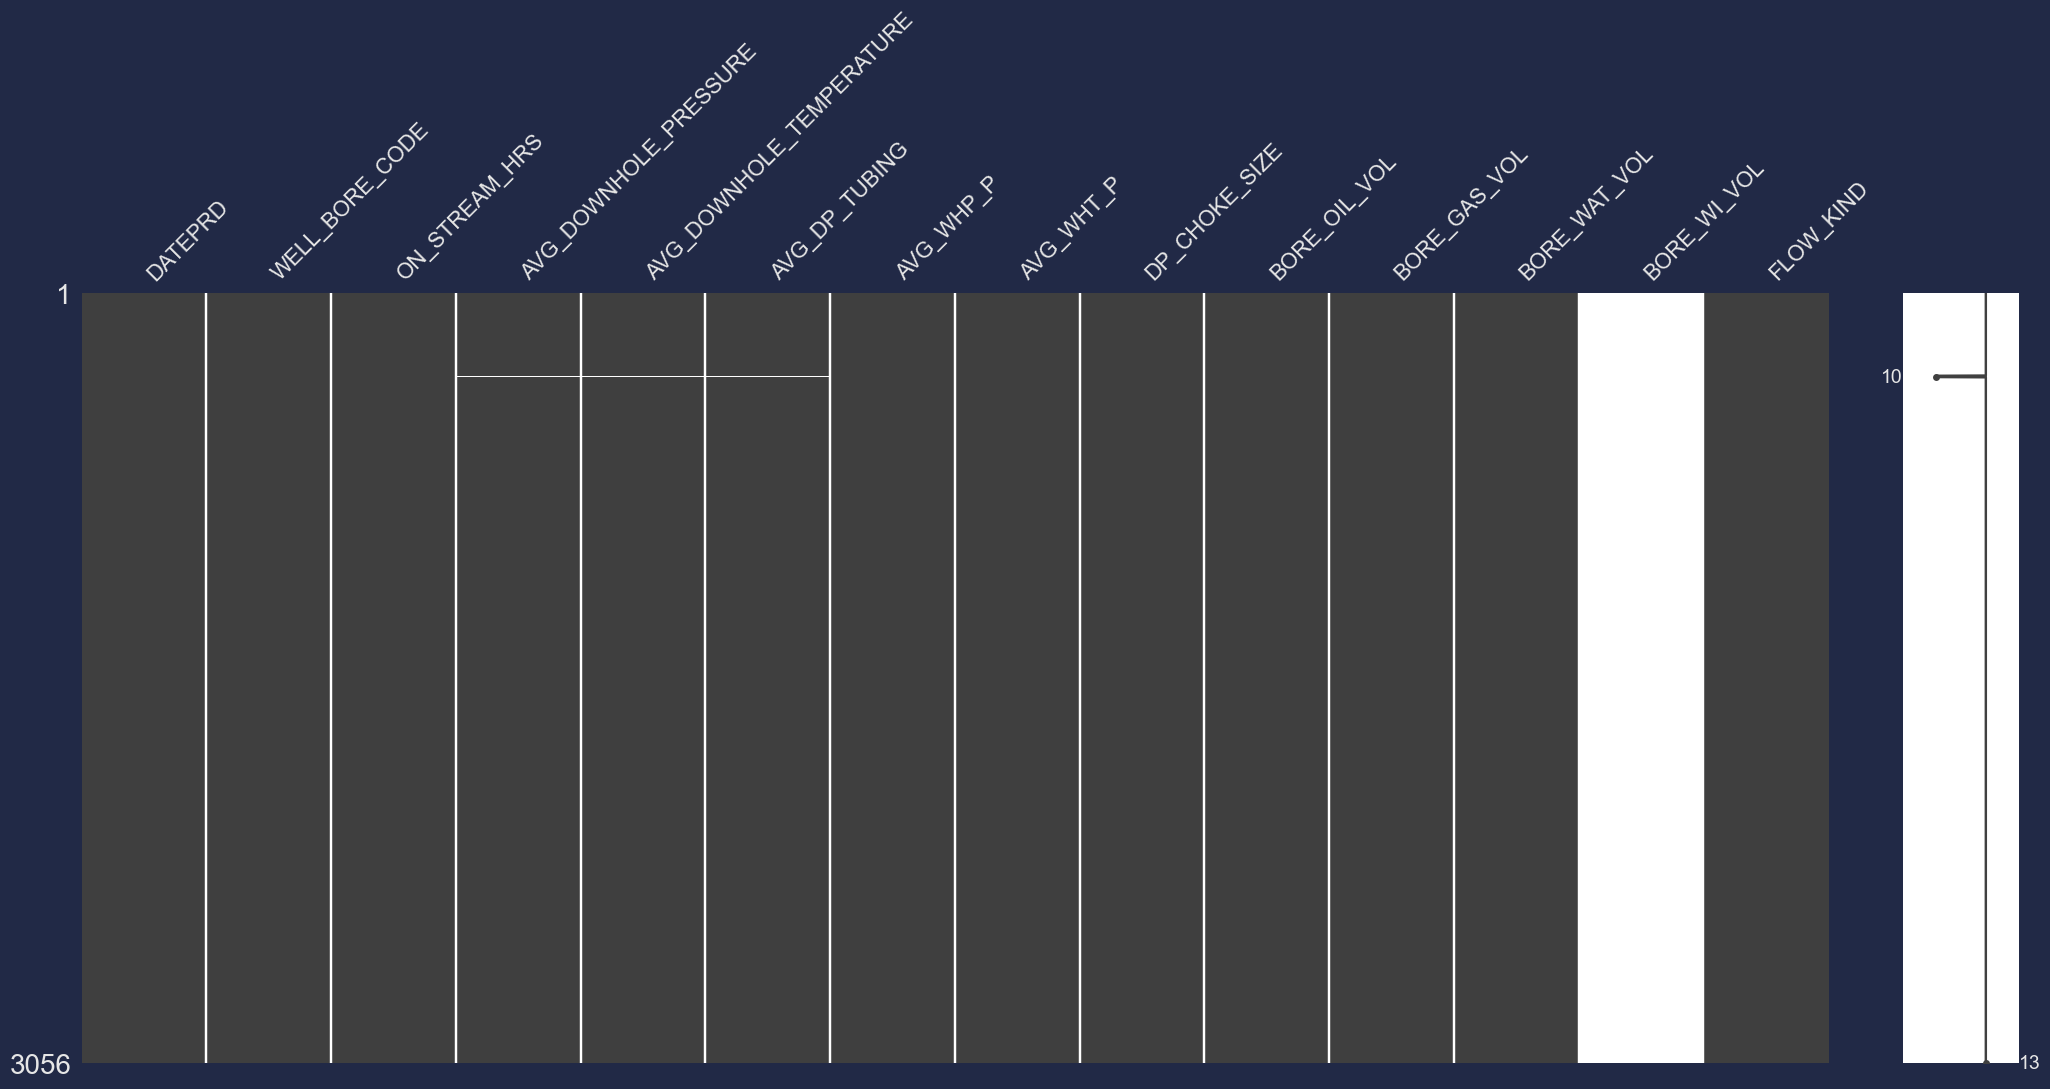

In [70]:
ms.matrix(df_well_c1);

In [71]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056 entries, 330 to 15605
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   3056 non-null   object 
 1   WELL_BORE_CODE            3056 non-null   object 
 2   ON_STREAM_HRS             3056 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64
 5   AVG_DP_TUBING             3050 non-null   float64
 6   AVG_WHP_P                 3056 non-null   float64
 7   AVG_WHT_P                 3056 non-null   float64
 8   DP_CHOKE_SIZE             3056 non-null   float64
 9   BORE_OIL_VOL              3056 non-null   float64
 10  BORE_GAS_VOL              3056 non-null   float64
 11  BORE_WAT_VOL              3056 non-null   float64
 12  BORE_WI_VOL               0 non-null      float64
 13  FLOW_KIND                 3056 non-null   object 
dtypes: fl

In [72]:
df_well_c1.describe() 

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
count    3056.000000            3050.000000               3050.000000   
mean       20.541124             233.074650                 95.133792   
std         7.881214              64.923764                 25.846815   
min         0.000000               0.000000                  0.000000   
25%        24.000000             237.493045                 99.620673   
50%        24.000000             246.776063                101.007540   
75%        24.000000             261.970976                105.049314   
max        25.000000             334.656140                106.772733   

       AVG_DP_TUBING    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
count    3050.000000  3056.000000  3056.000000    3056.000000   3056.000000   
mean      192.653083    41.530600    77.103031      15.435757   1289.997837   
std        57.736985    22.719568    25.615703      19.965154   1298.358922   
min         0.000000     0.000000     0.000000       0.000000      0.000000   
25%       180.749433    31.020474    81.223317       2.665658    209.862500   
50%       204.247625    33.545751    86.963304       7.177533    880.785000   
75%       229.632848    49.080514    88.538931      21.173839   2033.697500   
max       302.109760   125.718570    93.509584     125.718570   5644.370000   

        BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
count    3056.000000   3056.000000          0.0  
mean   189139.248043   2330.251878          NaN  
std    184204.114106   1462.934595          NaN  
min         0.000000    -59.190000          NaN  
25%     31304.035000    695.592500          NaN  
50%    142362.865000   2965.715000          NaN  
75%    305327.862500   3444.147500          NaN  
max    789974.730000   5691.770000          NaN

In [73]:
df_well_c1 = df_well_c1.drop(columns="BORE_WI_VOL")
df_well_c1

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
330    2008-02-12        Well-C1            0.0                    0.0   
334    2008-02-13        Well-C1            0.0                    0.0   
339    2008-02-14        Well-C1            0.0                    0.0   
341    2008-02-15        Well-C1            0.0                    0.0   
344    2008-02-16        Well-C1            0.0                    0.0   
...           ...            ...            ...                    ...   
15584  2016-09-13        Well-C1            0.0                    0.0   
15588  2016-09-14        Well-C1            0.0                    0.0   
15594  2016-09-15        Well-C1            0.0                    0.0   
15602  2016-09-16        Well-C1            0.0                    0.0   
15605  2016-09-17        Well-C1            0.0                    0.0   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_WHP_P  AVG_WHT_P  \
330                         0.0        0.00000    0.00000        0.0   
334                         0.0        0.00000    0.00000        0.0   
339                         0.0        0.00000    0.00000        0.0   
341                         0.0        0.00000    0.00000        0.0   
344                         0.0        0.00000    0.00000        0.0   
...                         ...            ...        ...        ...   
15584                       0.0       10.87335   10.87335        0.0   
15588                       0.0       10.87699   10.87699        0.0   
15594                       0.0       10.88277   10.88277        0.0   
15602                       0.0       10.87889   10.87889        0.0   
15605                       0.0       10.87613   10.87613        0.0   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND  
330          0.05885           0.0           0.0           0.0  production  
334          0.06768           0.0           0.0           0.0  production  
339          0.04950           0.0           0.0           0.0  production  
341          0.06640           0.0           0.0           0.0  production  
344          0.10479           0.0           0.0           0.0  production  
...              ...           ...           ...           ...         ...  
15584        8.89437           0.0           0.0           0.0  production  
15588        8.88767           0.0           0.0           0.0  production  
15594        8.85606           0.0           0.0           0.0  production  
15602        8.83878           0.0           0.0           0.0  production  
15605        8.82793           0.0           0.0           0.0  production  

[3056 rows x 13 columns]

In [74]:
df_well_c1.isnull().sum()

DATEPRD                     0
WELL_BORE_CODE              0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       6
AVG_DOWNHOLE_TEMPERATURE    6
AVG_DP_TUBING               6
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
FLOW_KIND                   0
dtype: int64

In [75]:
df_well_c1 = df_well_c1[df_well_c1["ON_STREAM_HRS"] > 0]

df_well_c1["oil_rate"] = df_well_c1["BORE_OIL_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1["water_rate"] = df_well_c1["BORE_WAT_VOL"] / df_well_c1["ON_STREAM_HRS"]

df_well_c1

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
936    2008-07-13        Well-C1       24.00000             260.866875   
939    2008-07-14        Well-C1        5.57000             256.248230   
943    2008-07-15        Well-C1       24.00000             254.982785   
946    2008-07-16        Well-C1       24.00000             251.475921   
951    2008-07-17        Well-C1       24.00000             249.346191   
...           ...            ...            ...                    ...   
15186  2016-07-09        Well-C1       22.66666             268.812764   
15194  2016-07-10        Well-C1       24.00000             265.922630   
15197  2016-07-11        Well-C1       23.66667             267.768521   
15205  2016-07-12        Well-C1       24.00000             266.002483   
15212  2016-07-13        Well-C1       14.89167             266.388898   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
936                  103.292880     160.151955  100.714919  52.381899   
939                  104.017718     156.649912   99.598318  71.115352   
943                  103.967009     156.332844   98.649941  67.590753   
946                  104.210557     155.817187   95.658734  73.782251   
951                  104.339184     155.760939   93.585252  78.035440   
...                         ...            ...         ...        ...   
15186                100.295456     239.081167   29.731597  87.864056   
15194                100.338436     238.398367   27.524263  89.153704   
15197                100.320956     238.638669   29.129852  89.074774   
15205                100.345865     238.273904   27.728579  89.503524   
15212                100.358734     238.257230   28.131667  89.354794   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND  \
936        69.539413       1735.26     252235.23          4.00  production   
939        68.016167        592.36      88949.00          1.37  production   
943        66.948884       2532.21     373786.28          5.84  production   
946        63.663812       3030.71     447840.09          9.13  production   
951        61.337700       3288.08     474614.43          7.58  production   
...              ...           ...           ...           ...         ...   
15186       4.114340        102.09      16681.29       2326.24  production   
15194       1.959482        113.38      18753.12       3185.47  production   
15197       3.407768        108.84      17979.28       3056.29  production   
15205       1.938210        113.84      18543.76       3148.91  production   
15212       2.536683         68.47      10591.65       1907.46  production   

         oil_rate  water_rate  
936     72.302500    0.166667  
939    106.348294    0.245961  
943    105.508750    0.243333  
946    126.279583    0.380417  
951    137.003333    0.315833  
...           ...         ...  
15186    4.503972  102.628265  
15194    4.724167  132.727917  
15197    4.598873  129.138996  
15205    4.743333  131.204583  
15212    4.597873  128.089059  

[2724 rows x 15 columns]

In [76]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Rate Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

In [77]:
# figure out how can that be a negative in water rate
# dataset.loc[1367, "categori"] = "BAIK"
# dataset[dataset["max"] == "PM25"]

df_well_c1[df_well_c1["water_rate"] < 0]

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
1864  2009-03-03        Well-C1         24.000             270.291285   
6798  2012-08-13        Well-C1          0.625             252.892348   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
1864                105.463574     168.305082  101.986203  79.554519   
6798                101.886570     206.739802   46.152546  83.714672   

      DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND  \
1864      68.800869       4339.13     616094.56         -0.95  production   
6798      17.203700        202.53       3754.12        -59.19  production   

        oil_rate  water_rate  
1864  180.797083   -0.039583  
6798  324.048000  -94.704000

In [78]:
# we can take this as an error in calculations, so we can delete this negative mark
df_well_c1.loc[1864, "BORE_WAT_VOL"] = 0.95
df_well_c1.loc[6798, "BORE_WAT_VOL"] = 59.19

In [79]:
# recalculate the oil and water rate

df_well_c1 = df_well_c1[df_well_c1["ON_STREAM_HRS"] > 0]

df_well_c1["oil_rate"] = df_well_c1["BORE_OIL_VOL"] / df_well_c1["ON_STREAM_HRS"]
df_well_c1["water_rate"] = df_well_c1["BORE_WAT_VOL"] / df_well_c1["ON_STREAM_HRS"]

df_well_c1

DATEPRD WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
936    2008-07-13        Well-C1       24.00000             260.866875   
939    2008-07-14        Well-C1        5.57000             256.248230   
943    2008-07-15        Well-C1       24.00000             254.982785   
946    2008-07-16        Well-C1       24.00000             251.475921   
951    2008-07-17        Well-C1       24.00000             249.346191   
...           ...            ...            ...                    ...   
15186  2016-07-09        Well-C1       22.66666             268.812764   
15194  2016-07-10        Well-C1       24.00000             265.922630   
15197  2016-07-11        Well-C1       23.66667             267.768521   
15205  2016-07-12        Well-C1       24.00000             266.002483   
15212  2016-07-13        Well-C1       14.89167             266.388898   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
936                  103.292880     160.151955  100.714919  52.381899   
939                  104.017718     156.649912   99.598318  71.115352   
943                  103.967009     156.332844   98.649941  67.590753   
946                  104.210557     155.817187   95.658734  73.782251   
951                  104.339184     155.760939   93.585252  78.035440   
...                         ...            ...         ...        ...   
15186                100.295456     239.081167   29.731597  87.864056   
15194                100.338436     238.398367   27.524263  89.153704   
15197                100.320956     238.638669   29.129852  89.074774   
15205                100.345865     238.273904   27.728579  89.503524   
15212                100.358734     238.257230   28.131667  89.354794   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND  \
936        69.539413       1735.26     252235.23          4.00  production   
939        68.016167        592.36      88949.00          1.37  production   
943        66.948884       2532.21     373786.28          5.84  production   
946        63.663812       3030.71     447840.09          9.13  production   
951        61.337700       3288.08     474614.43          7.58  production   
...              ...           ...           ...           ...         ...   
15186       4.114340        102.09      16681.29       2326.24  production   
15194       1.959482        113.38      18753.12       3185.47  production   
15197       3.407768        108.84      17979.28       3056.29  production   
15205       1.938210        113.84      18543.76       3148.91  production   
15212       2.536683         68.47      10591.65       1907.46  production   

         oil_rate  water_rate  
936     72.302500    0.166667  
939    106.348294    0.245961  
943    105.508750    0.243333  
946    126.279583    0.380417  
951    137.003333    0.315833  
...           ...         ...  
15186    4.503972  102.628265  
15194    4.724167  132.727917  
15197    4.598873  129.138996  
15205    4.743333  131.204583  
15212    4.597873  128.089059  

[2724 rows x 15 columns]

In [80]:
# recheck

df_well_c1[df_well_c1["water_rate"] < 0]

Empty DataFrame
Columns: [DATEPRD, WELL_BORE_CODE, ON_STREAM_HRS, AVG_DOWNHOLE_PRESSURE, AVG_DOWNHOLE_TEMPERATURE, AVG_DP_TUBING, AVG_WHP_P, AVG_WHT_P, DP_CHOKE_SIZE, BORE_OIL_VOL, BORE_GAS_VOL, BORE_WAT_VOL, FLOW_KIND, oil_rate, water_rate]
Index: []

In [81]:
# insert graph again to see

import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with two y-axes
# Initialize figure with subplots
figure = make_subplots(
            rows=1, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"}],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_OIL_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="BORE_WAT_VOL by Time",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=1, col=1
    )

# Set y-axis titles
figure.update_yaxes(title_text="Rate (m3/hr)", secondary_y=False)
# figure.update_yaxes(title_text="GOR (m3/m3)", secondary_y=True)

# Set chart title
figure.update_layout(
    title='Oil vs Water Rate Production',
    xaxis_title='Date'
)
# # Set theme, margin, and annotation in layout
# figure.update_layout(
#     template="plotly_dark",
#     margin=dict(r=10, t=25, b=40, l=60),
#     annotations=[
#         dict(
#             text="Source: NOAA",
#             showarrow=False,
#             xref="paper",
#             yref="paper",
#             x=0,
#             y=0)
#     ]
# )

figure.show()

In [82]:
df_well_c1.isnull().sum()

DATEPRD                     0
WELL_BORE_CODE              0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       6
AVG_DOWNHOLE_TEMPERATURE    6
AVG_DP_TUBING               6
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
FLOW_KIND                   0
oil_rate                    0
water_rate                  0
dtype: int64

In [83]:
# since the null data is only 6, we can drop them
df_well_c1 = df_well_c1.dropna()

In [84]:
# we can drop the ON_STREAM_HRS, BORE_GAS_VOL, BORE_WAT_VOL for the sake of avoiding data leakage

df_well_c1 = df_well_c1.drop(columns = ["ON_STREAM_HRS", "BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL", "FLOW_KIND"])
df_well_c1.head()

DATEPRD WELL_BORE_CODE  AVG_DOWNHOLE_PRESSURE  \
936  2008-07-13        Well-C1             260.866875   
939  2008-07-14        Well-C1             256.248230   
943  2008-07-15        Well-C1             254.982785   
946  2008-07-16        Well-C1             251.475921   
951  2008-07-17        Well-C1             249.346191   

     AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
936                103.292880     160.151955  100.714919  52.381899   
939                104.017718     156.649912   99.598318  71.115352   
943                103.967009     156.332844   98.649941  67.590753   
946                104.210557     155.817187   95.658734  73.782251   
951                104.339184     155.760939   93.585252  78.035440   

     DP_CHOKE_SIZE    oil_rate  water_rate  
936      69.539413   72.302500    0.166667  
939      68.016167  106.348294    0.245961  
943      66.948884  105.508750    0.243333  
946      63.663812  126.279583    0.380417  
951      61.337700  137.003333    0.315833

In [85]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 936 to 15212
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   2718 non-null   object 
 1   WELL_BORE_CODE            2718 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     2718 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  2718 non-null   float64
 4   AVG_DP_TUBING             2718 non-null   float64
 5   AVG_WHP_P                 2718 non-null   float64
 6   AVG_WHT_P                 2718 non-null   float64
 7   DP_CHOKE_SIZE             2718 non-null   float64
 8   oil_rate                  2718 non-null   float64
 9   water_rate                2718 non-null   float64
dtypes: float64(8), object(2)
memory usage: 233.6+ KB


In [86]:
# we can see that DATEPRD is not in datetime format
df_well_c1["DATEPRD"] = df_well_c1["DATEPRD"].astype("datetime64")

In [87]:
df_well_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 936 to 15212
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2718 non-null   datetime64[ns]
 1   WELL_BORE_CODE            2718 non-null   object        
 2   AVG_DOWNHOLE_PRESSURE     2718 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2718 non-null   float64       
 4   AVG_DP_TUBING             2718 non-null   float64       
 5   AVG_WHP_P                 2718 non-null   float64       
 6   AVG_WHT_P                 2718 non-null   float64       
 7   DP_CHOKE_SIZE             2718 non-null   float64       
 8   oil_rate                  2718 non-null   float64       
 9   water_rate                2718 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 233.6+ KB


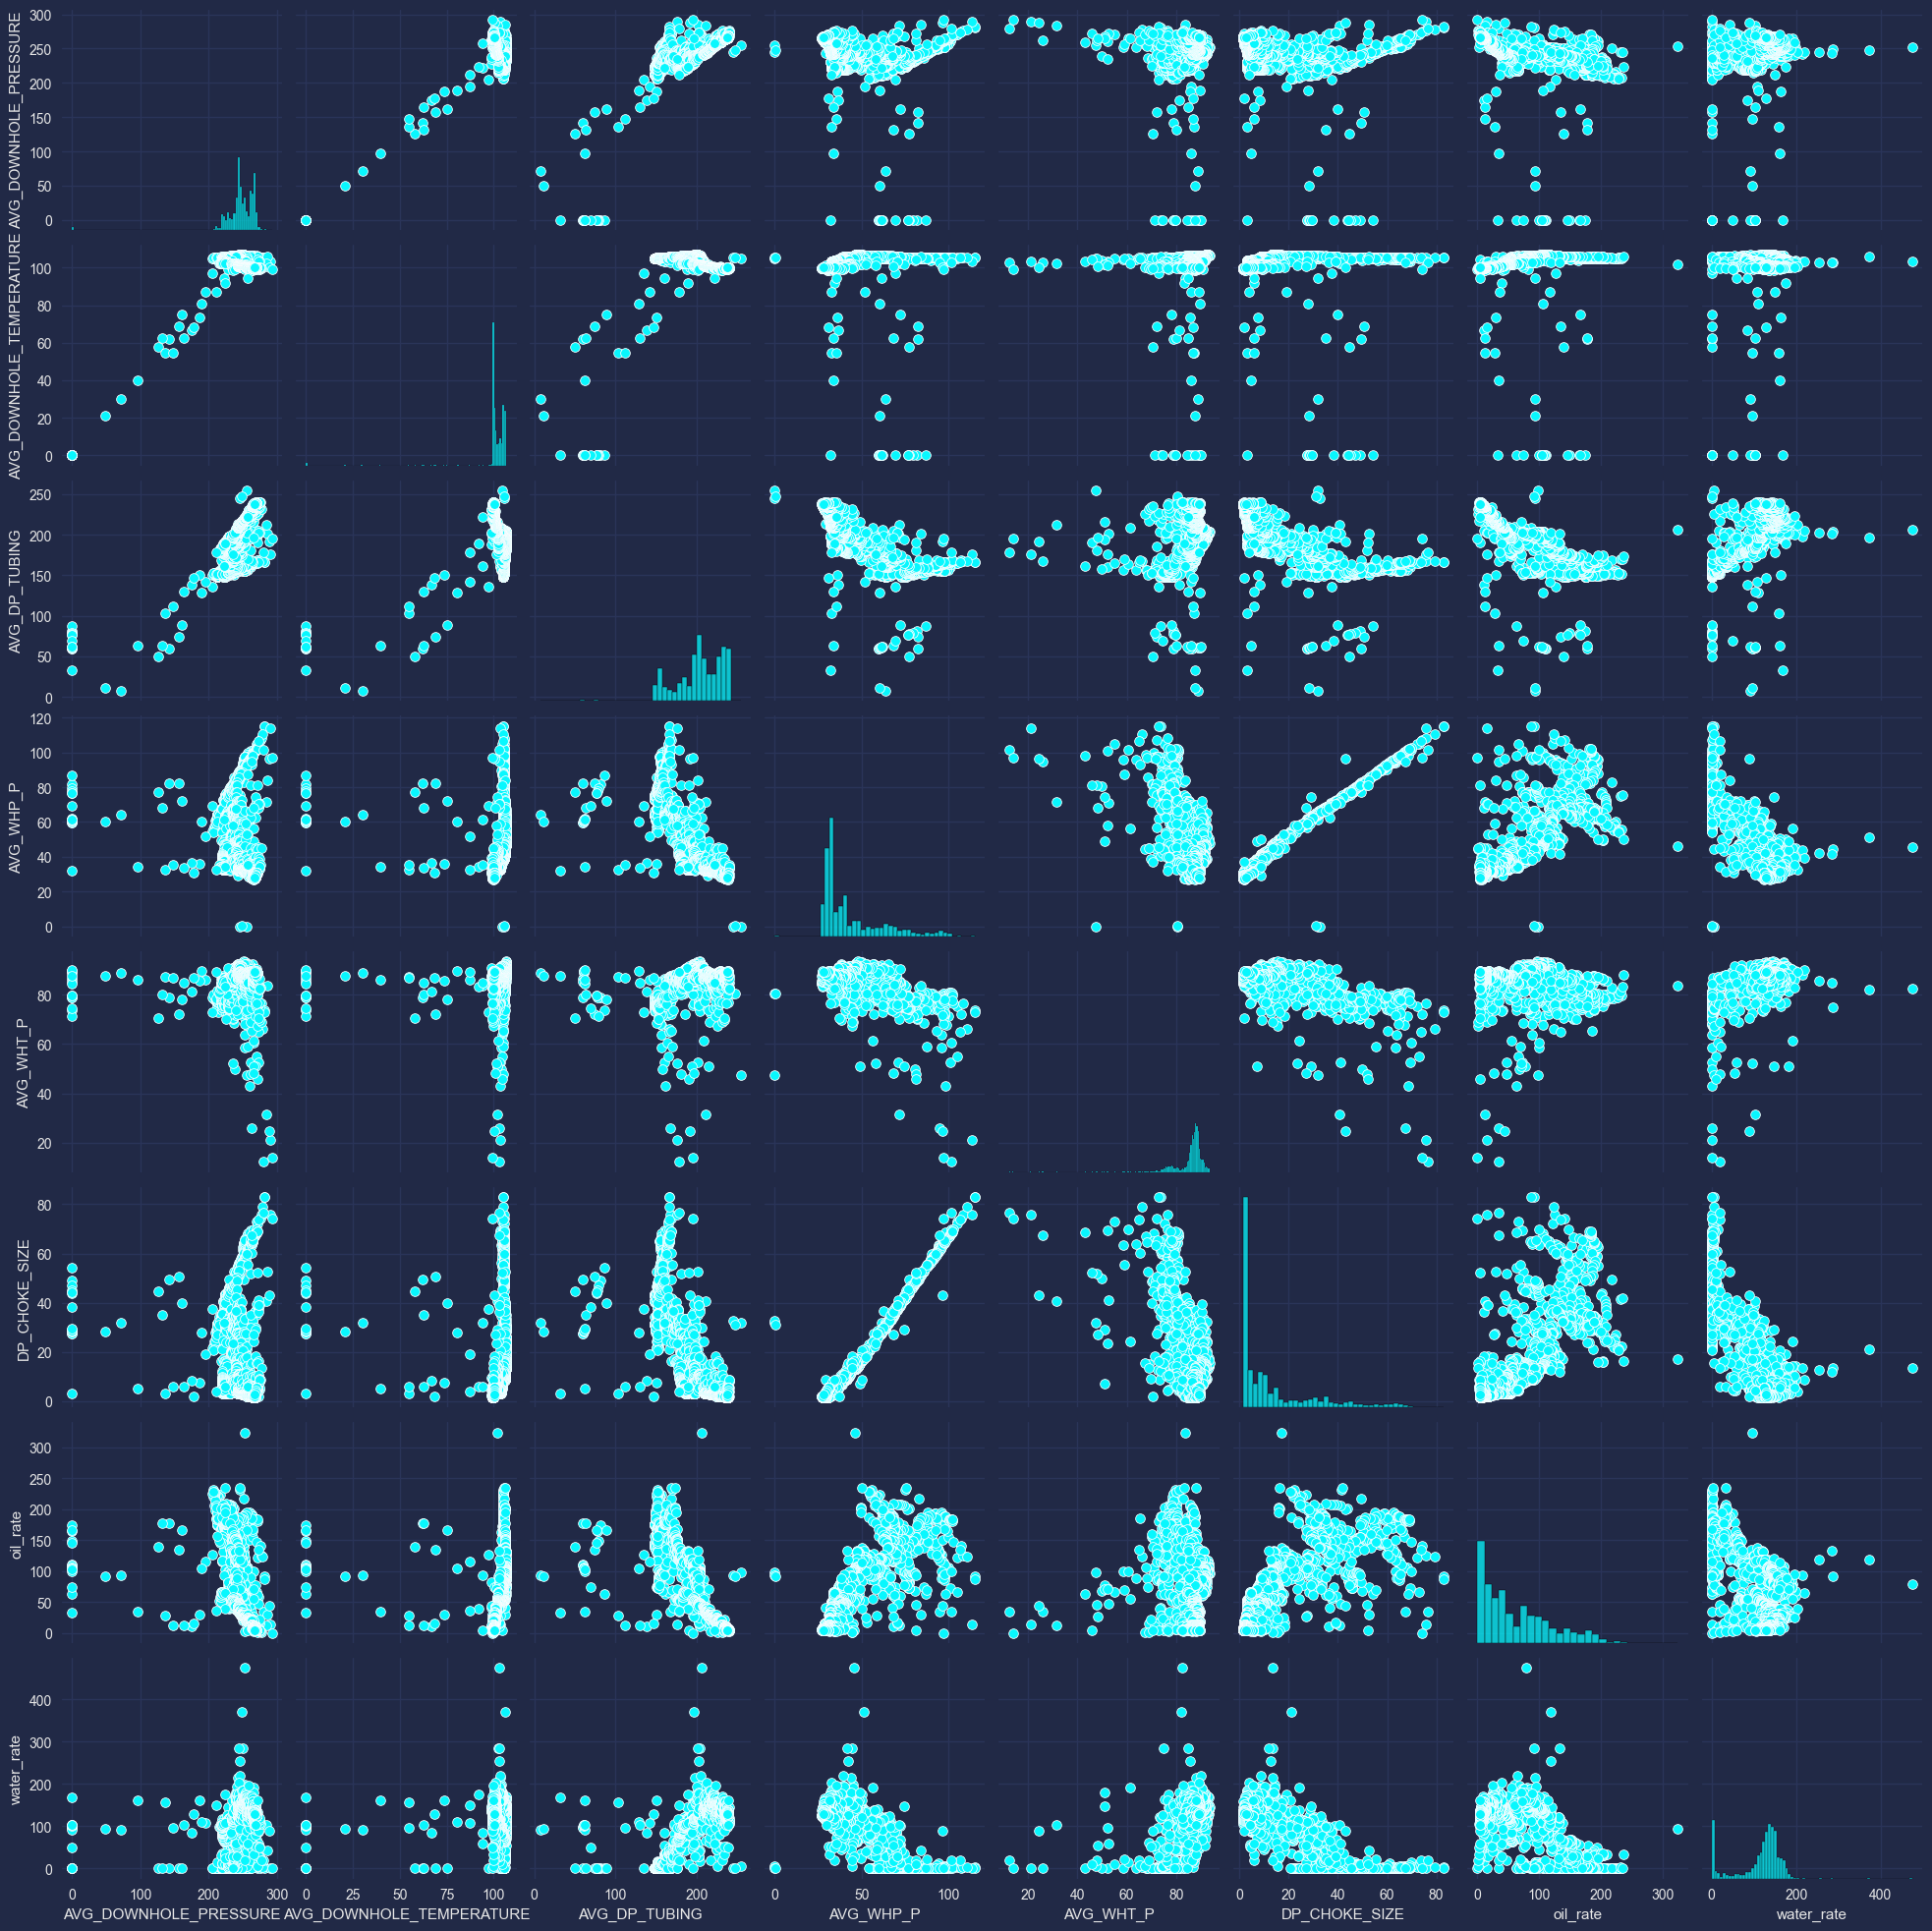

In [88]:
# have a look at all the scatter plots between all variables
sns.pairplot(df_well_c1);

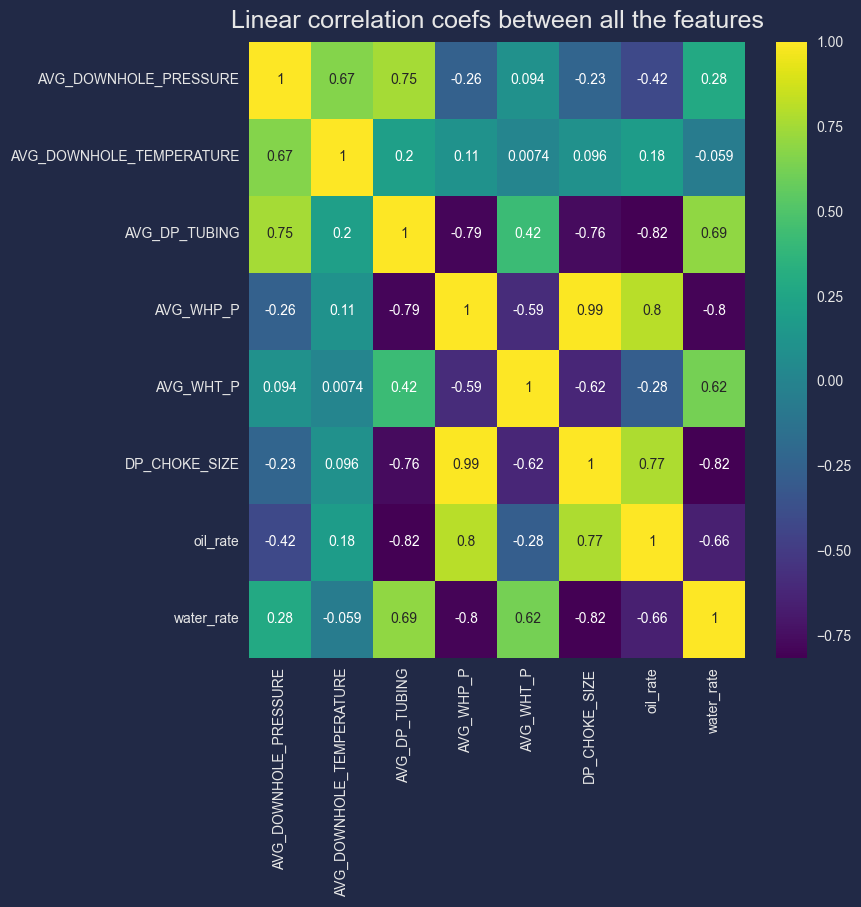

In [89]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1.corr(), annot=True, cmap="viridis");

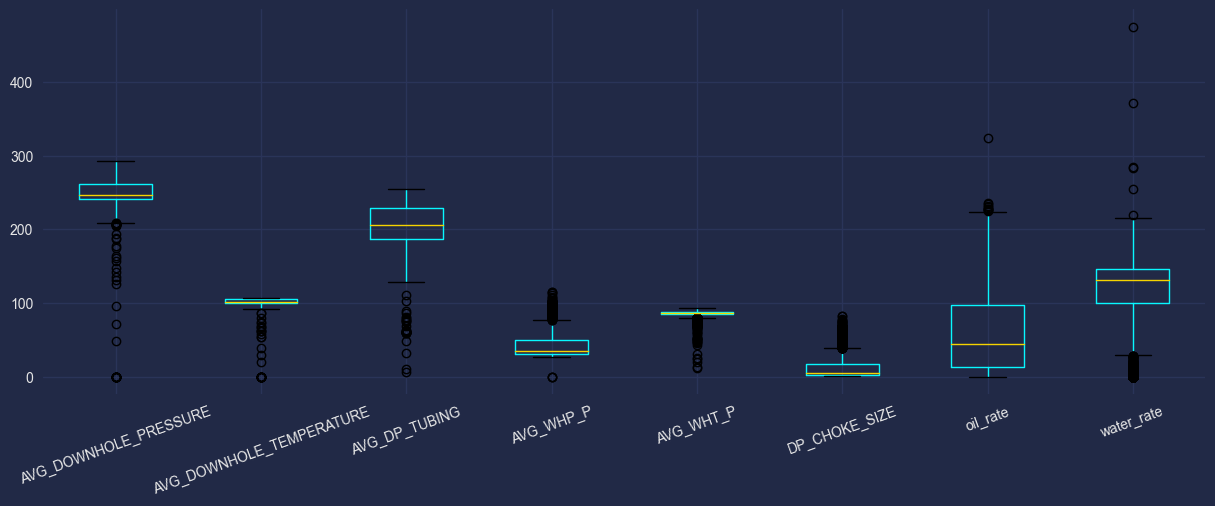

In [90]:
# show the data distribustion to see if there is outliers
plt.figure(figsize=(15,5))
df_well_c1.boxplot()
plt.xticks(rotation=20);

In [91]:
figure = make_subplots(
            rows=8, cols=1,
            # column_widths=[0.5, 0.5],
            # row_heights=[0.5, 0.5],
            specs=[
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
                [{"type": "scatter"},],
            ]
        )

# line chart for BORE_OIL_VOL
figure.add_trace(
    go.Scatter(
        name="oil_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["oil_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#f2b705'},
        showlegend=True
        ),
        row=1, col=1
    )

# line chart for BORE_WAT_VOL
figure.add_trace(
    go.Scatter(
        name="water_rate",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["water_rate"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=2, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_PRESSURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_PRESSURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=3, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DOWNHOLE_TEMPERATURE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DOWNHOLE_TEMPERATURE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=4, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_DP_TUBING",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_DP_TUBING"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=5, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHP_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHP_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=6, col=1
    )

figure.add_trace(
    go.Scatter(
        name="AVG_WHT_P",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["AVG_WHT_P"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=7, col=1
    )

figure.add_trace(
    go.Scatter(
        name="DP_CHOKE_SIZE",
        x=df_well_c1["DATEPRD"],
        y=df_well_c1["DP_CHOKE_SIZE"],
        mode='lines',
        # fill='tozeroy',  # Set fill to 'tozeroy' for area below the line
        # line={'color': '#03a6a6'},
        showlegend=True
        ),
        row=8, col=1
    )

figure.update_layout(
            height=2000,
            autosize=True,  # Allow the figure to be autosized
            margin=dict(l=10, r=10, t=10, b=10),  # Adjust the margins for the figure
            legend=dict(
                x=0.75,   # Set the x position of the legend (0.5 means centered horizontally)
                y=1.0,   # Set the y position of the legend (1.0 means at the top)
                xanchor='center',  # Anchor point for the x position ('center' for center alignment)
                yanchor='top',     # Anchor point for the y position ('top' for top alignment)
                orientation='v',   # Orientation of the legend ('h' for horizontal)
                bgcolor='rgba(255, 255, 255, 0.5)',  # Background color of the legend (with transparency)
                # bordercolor='rgba(0, 0, 0, 0.5)',     # Border color of the legend (with transparency)
                # borderwidth=1       # Border width of the legend
            )
        )

figure.show()

In [92]:
# lets remove zero and some outliers

df_well_c1 = df_well_c1[df_well_c1 != 0]
df_well_c1 = df_well_c1[df_well_c1["water_rate"] < 300]

#remove as i think anomoly data in the average tuping losses 
df_well_c1 = df_well_c1[df_well_c1["AVG_DP_TUBING"] > 100]
df_well_c1 = df_well_c1[ df_well_c1["AVG_WHP_P"] >10 ]
df_well_c1.head()

DATEPRD WELL_BORE_CODE  AVG_DOWNHOLE_PRESSURE  \
936 2008-07-13        Well-C1             260.866875   
939 2008-07-14        Well-C1             256.248230   
943 2008-07-15        Well-C1             254.982785   
946 2008-07-16        Well-C1             251.475921   
951 2008-07-17        Well-C1             249.346191   

     AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING   AVG_WHP_P  AVG_WHT_P  \
936                103.292880     160.151955  100.714919  52.381899   
939                104.017718     156.649912   99.598318  71.115352   
943                103.967009     156.332844   98.649941  67.590753   
946                104.210557     155.817187   95.658734  73.782251   
951                104.339184     155.760939   93.585252  78.035440   

     DP_CHOKE_SIZE    oil_rate  water_rate  
936      69.539413   72.302500    0.166667  
939      68.016167  106.348294    0.245961  
943      66.948884  105.508750    0.243333  
946      63.663812  126.279583    0.380417  
951      61.337700  137.003333    0.315833

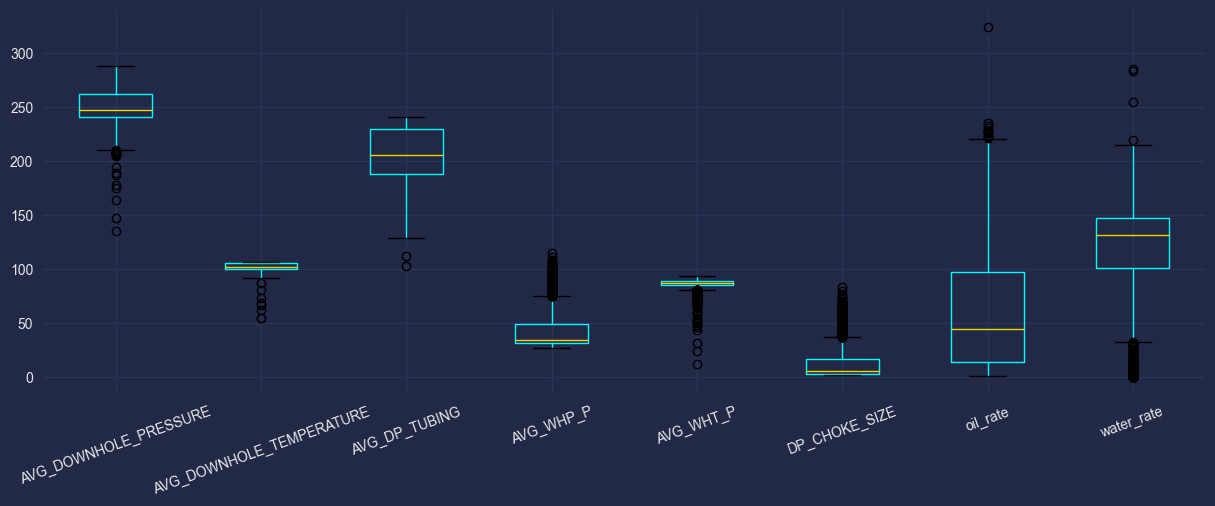

In [93]:
plt.figure(figsize=(15,5))
df_well_c1.boxplot()
plt.xticks(rotation=20);

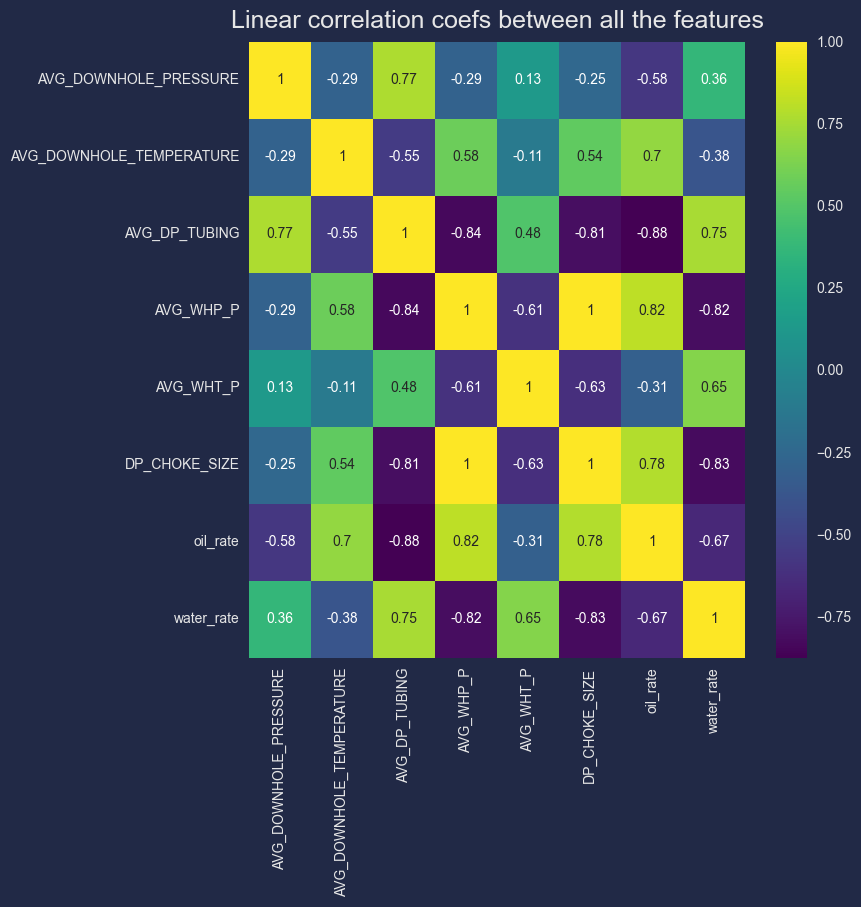

In [94]:
# show the pearson correlation coef between all the variables, show the linear correlation
plt.figure(figsize=(8,8))
plt.title("Linear correlation coefs between all the features",fontsize=18,pad=10)
sns.heatmap(df_well_c1.corr(), annot=True, cmap="viridis");

# Create ML Models

split input-output

In [95]:
# change from dates into days

df = df_well_c1
# df
df["days"] = (df["DATEPRD"] - df["DATEPRD"].min()).dt.days

In [103]:
X = df[["days",'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING'
     ,'AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE']]
y = df[['oil_rate', 'water_rate']]

In [110]:
X

days  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
936       0             260.866875                103.292880     160.151955   
939       1             256.248230                104.017718     156.649912   
943       2             254.982785                103.967009     156.332844   
946       3             251.475921                104.210557     155.817187   
951       4             249.346191                104.339184     155.760939   
...     ...                    ...                       ...            ...   
15186  2918             268.812764                100.295456     239.081167   
15194  2919             265.922630                100.338436     238.398367   
15197  2920             267.768521                100.320956     238.638669   
15205  2921             266.002483                100.345865     238.273904   
15212  2922             266.388898                100.358734     238.257230   

        AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  
936    100.714919  52.381899      69.539413  
939     99.598318  71.115352      68.016167  
943     98.649941  67.590753      66.948884  
946     95.658734  73.782251      63.663812  
951     93.585252  78.035440      61.337700  
...           ...        ...            ...  
15186   29.731597  87.864056       4.114340  
15194   27.524263  89.153704       1.959482  
15197   29.129852  89.074774       3.407768  
15205   27.728579  89.503524       1.938210  
15212   28.131667  89.354794       2.536683  

[2686 rows x 7 columns]

In [111]:
y

oil_rate  water_rate
936     72.302500    0.166667
939    106.348294    0.245961
943    105.508750    0.243333
946    126.279583    0.380417
951    137.003333    0.315833
...           ...         ...
15186    4.503972  102.628265
15194    4.724167  132.727917
15197    4.598873  129.138996
15205    4.743333  131.204583
15212    4.597873  128.089059

[2686 rows x 2 columns]

Handling outliers

In [133]:
# from EDA above, we can see there are still so many outliers
# we want to reduce it by using robust scaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

In [134]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
detector = IsolationForest(contamination=0.05)  # Adjust contamination based on the expected proportion of outliers
detector.fit(X_scaled)
outlier_mask = detector.predict(X_scaled) == -1

In [136]:
X_cleaned = X[~outlier_mask]
y_cleaned = y[~outlier_mask]

split train-test data

In [115]:
# using sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = False,
                                                    random_state = 123)

In [116]:
print(X_train.shape, X_test.shape)

(2148, 7) (538, 7)


In [112]:
# using manual

# splitting the data to frecast 
train_size =  int(.8 * len(X))
X_train_m = X.iloc[:train_size]
y_train_m = y.iloc[:train_size]
X_test_m = X.iloc[train_size:]
y_test_m = y.iloc[train_size:]


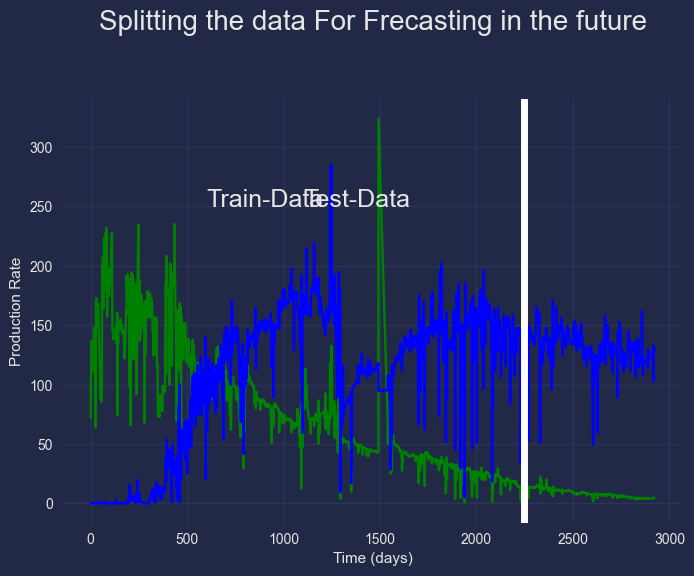

In [119]:
# # gambaran training and test data

# train_size=  int(.75 * len(X))

# plt.title("Splitting the data For Frecasting in the future",fontsize=20,pad=50)
# plt.plot(X_train_m["days"],y_train_m["oil_rate"],color="green")
# plt.plot(X_train_m["days"],y_train_m["water_rate"],color="blue")
# plt.plot(X_test_m["days"],y_test_m["oil_rate"],color="green")
# plt.plot(X_test_m["days"],y_test_m["water_rate"],color="blue")
# plt.xlabel("Time (days)")
# plt.ylabel("Production Rate")
# plt.axvline(x = X["days"].iloc[train_size], color = '#fff', label = 'axvline - full height',linewidth=5);
# plt.annotate('Train-Data', xy=(600, 250), xytext=(600, 250),fontsize=18)
# plt.annotate('Test-Data', xy=(600, 250),  xytext=(1100, 250),fontsize=18)
# plt.show()

# gambaran training and test data

train_size=  int(.75 * len(X))

plt.title("Splitting the data For Frecasting in the future",fontsize=20,pad=50)
plt.plot(X_train["days"],y_train["oil_rate"],color="green")
plt.plot(X_train["days"],y_train["water_rate"],color="blue")
plt.plot(X_test["days"],y_test["oil_rate"],color="green")
plt.plot(X_test["days"],y_test["water_rate"],color="blue")
plt.xlabel("Time (days)")
plt.ylabel("Production Rate")
plt.axvline(x = X["days"].iloc[train_size], color = '#fff', label = 'axvline - full height',linewidth=5);
# plt.annotate('Train-Data', xy=(600, 250), xytext=(600, 250),fontsize=18)
# plt.annotate('Test-Data', xy=(600, 250),  xytext=(1100, 250),fontsize=18)
plt.show()

remove outliers

In [122]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest

In [123]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [98]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression

# caclulate mean absolute error in each
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

use XGBoost Model

In [99]:
# the parameter are found after gridsearch among possible groups and found the following are the best to use
xbg = XGBRegressor(max_depth=10,n_estimators=1000,objective="reg:squarederror",gamma=.3)
xbg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [100]:
## make a function to show the model evaluationis
def eval(model):
    # get the mean absolute error
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    oil_mae = mean_absolute_error(y_test["oil_rate"],y_pred[:,0])
    oil_r2 = r2_score(y_test["oil_rate"],y_pred[:,0])
    water_mae = mean_absolute_error(y_test["water_rate"],y_pred[:,1])
    water_r2 = r2_score(y_test["water_rate"],y_pred[:,1])
    print(f" Oil MAE :{oil_mae} , R2 :{oil_r2}")
    print(f" Water MAE :{water_mae} , R2 :{water_r2}")
    
    # show the result
    plt.figure(figsize=(10,6))
    plt.title("Show model results",fontsize=20,pad=40)
    plt.plot(X_test["days"],y_pred[:,0],color="#F1C40F",label="oil_prdiction")
    plt.plot(X_test["days"],y_pred[:,1],color="#40E0D0",label="water_prediction")
    plt.plot(X_test["days"],y_test["oil_rate"],color="#D35400",label="True_oil")
    plt.plot(X_test["days"],y_test["water_rate"],color="blue",label="True-Water")
    plt.plot(X_train["days"],y_train["oil_rate"],color="#D35400")
    plt.plot(X_train["days"],y_train["water_rate"],color="blue")
    plt.axvline(x = X["days"].iloc[train_size], color = '#fff',linewidth=3, label = 'Begining of Prediciton');
    plt.legend()
    plt.show()

 Oil MAE :2.6300128155018334 , R2 :-0.09669423081211193
 Water MAE :48.46637373969636 , R2 :-20.438165188480156


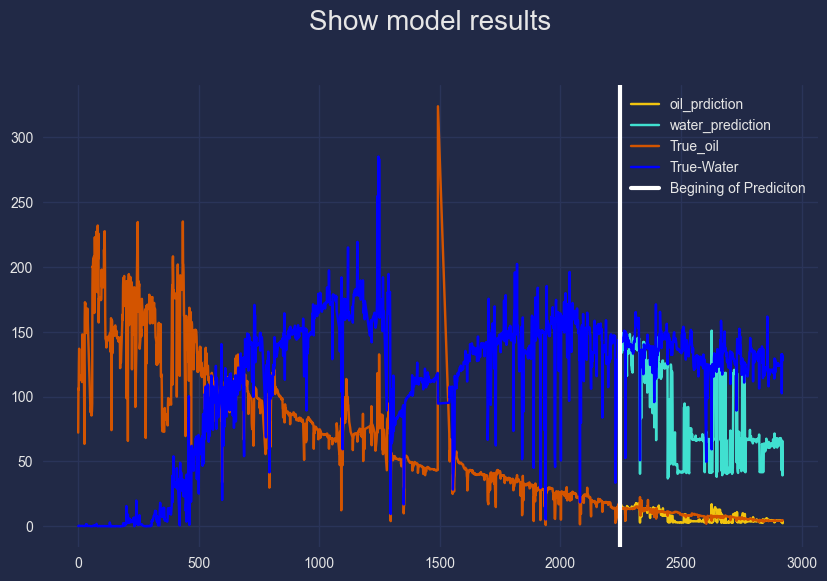

In [101]:
# evaluate the xbgboost
eval(xbg)

Use Linear Regression

 Oil MAE :30.429365548746134 , R2 :-95.0288519529661
 Water MAE :29.148751307129427 , R2 :-5.263495167327142


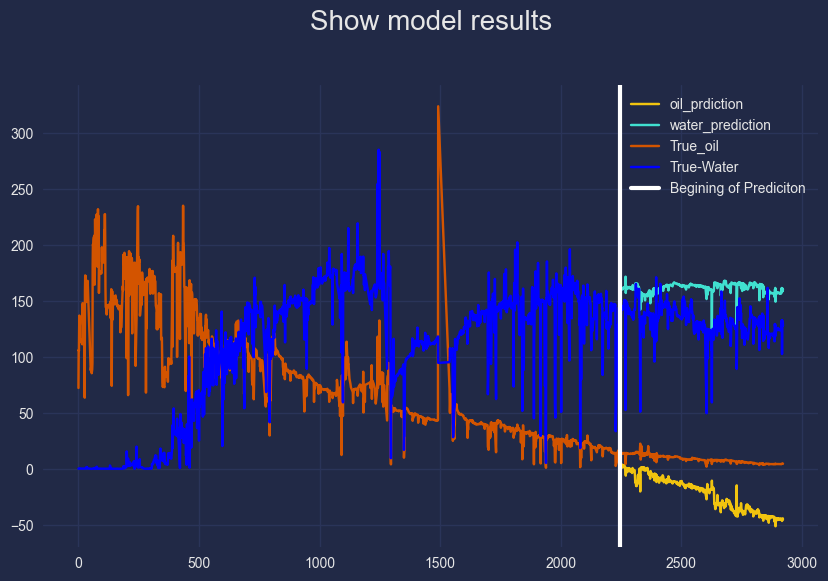

In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)
eval(lr)